# Modeling

## Logistic Regression (Basic Model)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

### Pipeline with StandardScaler and Logisitic Regression

In [26]:
data_model = Pipeline([('ss', StandardScaler()),
                              ('LR', LogisticRegression(solver='liblinear', fit_intercept=False, random_state=42))])

data_model.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('LR',
                 LogisticRegression(fit_intercept=False, random_state=42,
                                    solver='liblinear'))])

In [27]:
y_train_pred = data_model.predict(X_train)
y_test_pred = data_model.predict(X_test)

In [28]:
print(f'Accuracy Score Train: {accuracy_score(y_train, y_train_pred)}')
print(f'Accuracy Score Test: {accuracy_score(y_test, y_test_pred)}')
print(f'ROC_AUC Test: {roc_auc_score(y_test, y_test_pred)}')

Accuracy Score Train: 0.5011080393189398
Accuracy Score Test: 0.4982183605406354
ROC_AUC Test: 0.5678102494291235


In [29]:
print(confusion_matrix(y_test, y_test_pred))

[[56716 57144]
 [   29    51]]


In [30]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.50      0.66    113860
         1.0       0.00      0.64      0.00        80

    accuracy                           0.50    113940
   macro avg       0.50      0.57      0.33    113940
weighted avg       1.00      0.50      0.66    113940



In [31]:
print(metrics.accuracy_score(y_test, y_test_pred))

0.4982183605406354


## Decision Tree

### Vanilla - Decision Tree Classifier on 'REAR END'

In [32]:
data_model = DecisionTreeClassifier(random_state = 10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
data_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [33]:
y_train_pred = data_model.predict(X_train)
y_test_pred = data_model.predict(X_test)

In [34]:
print(f'Accuracy Score Train: {accuracy_score(y_train, y_train_pred)}')
print(f'Accuracy Score Test: {accuracy_score(y_test, y_test_pred)}')
print(f'ROC_AUC Test: {roc_auc_score(y_test, y_test_pred)}')

Accuracy Score Train: 0.9996379673512374
Accuracy Score Test: 0.9993154291732491
ROC_AUC Test: 0.6686402160548042


In [35]:
print(confusion_matrix(y_test, y_test_pred))

[[113835     25]
 [    53     27]]


In [36]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    113860
         1.0       0.52      0.34      0.41        80

    accuracy                           1.00    113940
   macro avg       0.76      0.67      0.70    113940
weighted avg       1.00      1.00      1.00    113940



### Decision Tree Classifier - Feature Importance

In [37]:
data_model.feature_importances_

array([2.48099950e-02, 1.84848713e-02, 2.40749622e-02, 6.33702569e-02,
       9.62337641e-02, 1.73352929e-02, 4.49038834e-02, 4.49988124e-02,
       9.87841517e-03, 1.53406729e-02, 1.63064725e-02, 4.98106378e-01,
       1.25392550e-01, 5.15468362e-05, 7.10188968e-04, 1.93724499e-06])

Feature ranking:
1. feature 11 (0.498106)
2. feature 12 (0.125393)
3. feature 4 (0.096234)
4. feature 3 (0.063370)
5. feature 7 (0.044999)
6. feature 6 (0.044904)
7. feature 0 (0.024810)
8. feature 2 (0.024075)
9. feature 1 (0.018485)
10. feature 5 (0.017335)
11. feature 10 (0.016306)
12. feature 9 (0.015341)
13. feature 8 (0.009878)
14. feature 14 (0.000710)
15. feature 13 (0.000052)
16. feature 15 (0.000002)


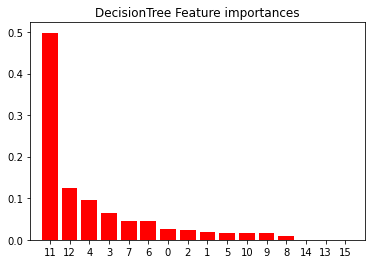

In [38]:
importances = data_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plotting feature importances of the forest
plt.figure()
plt.title("DecisionTree Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [39]:
def plot_tree(data_tree, used_cols, out_file='mytree.png'):
    export_graphviz(data_tree, out_file=out_file, 
                    filled=True, feature_names=used_cols, 
                    leaves_parallel=True, node_ids=True)
    with open(out_file) as f:
        dot_graph = f.read()
    return graphviz.Source(dot_graph)

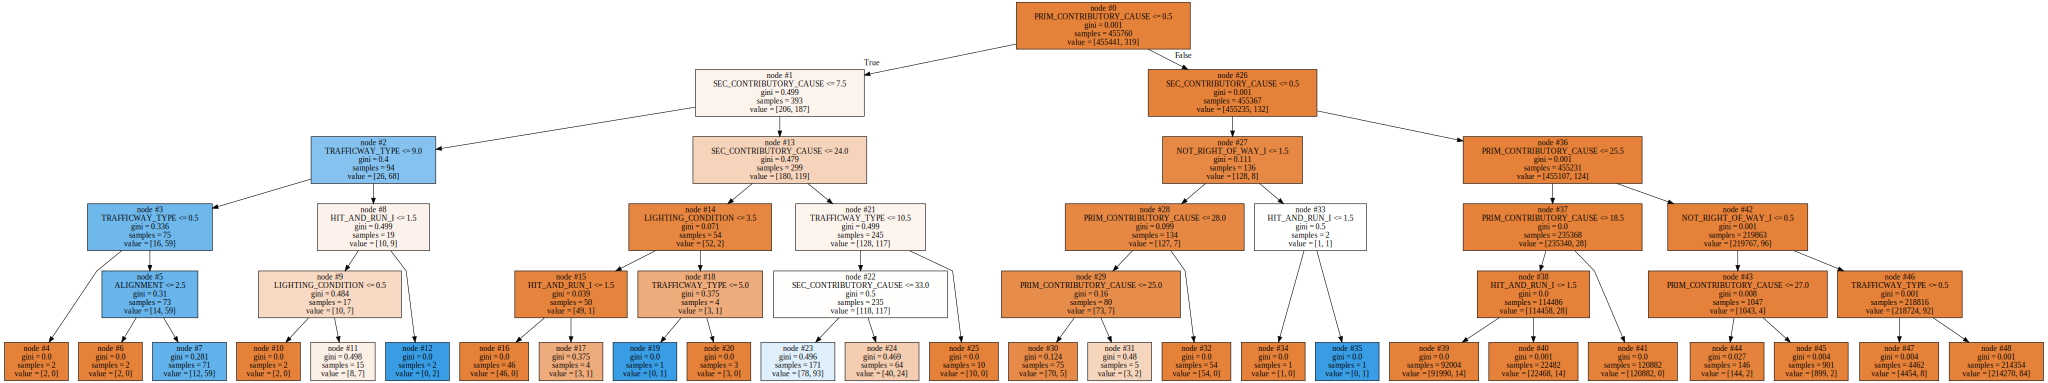

In [40]:
data_model_2 = DecisionTreeClassifier(random_state=1, max_depth=5)
data_model_2.fit(X_train, y_train)
plot_tree(data_model_2, X.columns.tolist())

### Decision Tree Classifier ('REAR END') with Parameters

In [41]:
data_model_2 = DecisionTreeClassifier(random_state=10, max_depth=10, max_leaf_nodes=30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [42]:
data_model_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=30, random_state=10)

In [43]:
y_train_pred_2 = data_model_2.predict(X_train)
y_test_pred_2 = data_model_2.predict(X_test)
print(f'Accuracy Score Train: {accuracy_score(y_train, y_train_pred_2)}')
print(f'Accuracy Score Test: {accuracy_score(y_test, y_test_pred_2)}')
print(f'ROC_AUC Test: {roc_auc_score(y_test, y_test_pred_2)}')

Accuracy Score Train: 0.999488766017202
Accuracy Score Test: 0.9993593119185536
ROC_AUC Test: 0.6624165642016512


<h3>
    <ul>
        <li>As we can see, Vanilla - Decision Tree model did better than Decision Tree Classifier</li>
    </ul>
</h3>

## Random Forest 

### Vanilla - Random Forest Classifier : REAR_END (minor parameter changes)

In [44]:
random_forest = RandomForestClassifier(class_weight='balanced', random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
random_forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

In [45]:
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

In [46]:
print(f'Accuracy Score Train: {accuracy_score(y_train, y_train_pred)}')
print(f'Accuracy Score Test: {accuracy_score(y_test, y_test_pred)}')
print(f'ROC_AUC Test: {roc_auc_score(y_test, y_test_pred)}')

Accuracy Score Train: 0.9581161137440758
Accuracy Score Test: 0.9565824117956819
ROC_AUC Test: 0.6847323467416125


### Random Forest Classifier - Feature Importance

Feature ranking:
1. feature 11 (0.463557)
2. feature 12 (0.139815)
3. feature 4 (0.105621)
4. feature 3 (0.052248)
5. feature 0 (0.046667)
6. feature 10 (0.041431)
7. feature 2 (0.026508)
8. feature 1 (0.025470)
9. feature 6 (0.024598)
10. feature 8 (0.022451)
11. feature 9 (0.020529)
12. feature 7 (0.019096)
13. feature 5 (0.010007)
14. feature 14 (0.001471)
15. feature 13 (0.000453)
16. feature 15 (0.000078)


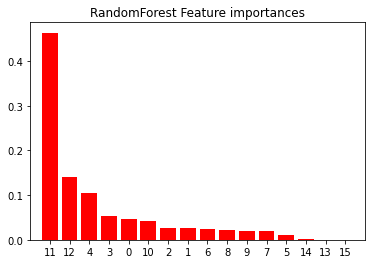

In [47]:
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("RandomForest Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Logistic Regression
<ul>
    <li>Accuracy Score Train: 0.5011080393189398</li> 
    <li>Accuracy Score Test: 0.4982183605406354</li>
    <li>ROC_AUC Test: 0.5678102494291235</li>
</ul>

### Vanilla - Decision Tree Classifier
<ul>
    <li>Accuracy Score Train: 0.9996379673512374</li>
    <li>Accuracy Score Test: 0.9993154291732491</li>
    <li>ROC_AUC Test: 0.6686402160548042</li>
</ul>

### Decision Tree Classifier
<ul>
    <li>Accuracy Score Train: 0.999488766017202</li>
    <li>Accuracy Score Test: 0.9993593119185536</li>
    <li>ROC_AUC Test: 0.6624165642016512</li>
</ul>

### Vanilla - Random Forest Classifier
<ul>
    <li>Accuracy Score Train: 0.9581161137440758</li>
    <li>Accuracy Score Test: 0.9565824117956819</li>
    <li>ROC_AUC Test: 0.6847323467416125</li>
</ul>

Since, ROC_AUC Score of Vanilla - Random Forest Classifier is highest

### So, we will making GridSearch for Random Forest Classifier
<br>

### Random Forest Classifier - Hyperparameters (GridSearchCV)

In [48]:
grid_params = {"n_estimators": [50, 100],
          "criterion": ["gini", "entropy"],
          "max_depth": [4, 6, 10],
          "min_samples_split": [5, 10],
          "min_samples_leaf": [5, 10],
         "max_samples": [400]}

grid_search = GridSearchCV(random_forest, grid_params, n_jobs=-1, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 10], 'max_samples': [400],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [5, 10],
                         'n_estimators': [50, 100]},
             scoring='roc_auc')

In [49]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_samples': 400,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 100}

In [50]:
grid_search.best_score_

0.8290781329331086

<h3>
    <ul>
        <li>ROC_AUC SCORE = 0.8290781329331086</li>
    </ul>
</h3>

## Data Visual : Rear End Crashes

In [51]:
data_frame['TRAFFICWAY_TYPE'].value_counts()

NOT DIVIDED                        252277
DIVIDED - W/MEDIAN (NOT RAISED)     97772
ONE-WAY                             75072
PARKING LOT                         39812
DIVIDED - W/MEDIAN BARRIER          33603
FOUR WAY                            23102
OTHER                               15913
ALLEY                                9345
UNKNOWN                              6280
T-INTERSECTION                       4914
CENTER TURN LANE                     4591
DRIVEWAY                             1948
RAMP                                 1787
UNKNOWN INTERSECTION TYPE            1286
FIVE POINT, OR MORE                   571
Y-INTERSECTION                        563
TRAFFIC ROUTE                         434
NOT REPORTED                          212
ROUNDABOUT                            139
L-INTERSECTION                         79
Name: TRAFFICWAY_TYPE, dtype: int64

In [52]:
data_frame['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE                                                                 214263
FAILING TO YIELD RIGHT-OF-WAY                                                        62279
FOLLOWING TOO CLOSELY                                                                58620
NOT APPLICABLE                                                                       30562
IMPROPER OVERTAKING/PASSING                                                          27224
FAILING TO REDUCE SPEED TO AVOID CRASH                                               24670
IMPROPER BACKING                                                                     24192
IMPROPER LANE USAGE                                                                  21560
IMPROPER TURNING/NO SIGNAL                                                           18813
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  18082
DISREGARDING TRAFFIC SIGNALS                                                         10739

In [53]:
rear_end = data_frame[data_frame['FIRST_CRASH_TYPE'] == 'REAR END']
rear_end.TRAFFICWAY_TYPE.value_counts().index
rear_end.PRIM_CONTRIBUTORY_CAUSE.value_counts().index

Index(['FOLLOWING TOO CLOSELY', 'UNABLE TO DETERMINE',
       'FAILING TO REDUCE SPEED TO AVOID CRASH', 'NOT APPLICABLE',
       'IMPROPER BACKING', 'WEATHER', 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE',
       'FAILING TO YIELD RIGHT-OF-WAY', 'DISTRACTION - FROM INSIDE VEHICLE',
       'IMPROPER OVERTAKING/PASSING',
       'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',
       'IMPROPER LANE USAGE', 'EQUIPMENT - VEHICLE CONDITION',
       'DISTRACTION - FROM OUTSIDE VEHICLE', 'PHYSICAL CONDITION OF DRIVER',
       'EXCEEDING SAFE SPEED FOR CONDITIONS',
       'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)',
       'DISREGARDING TRAFFIC SIGNALS', 'EXCEEDING AUTHORIZED SPEED LIMIT',
       'CELL PHONE USE OTHER THAN TEXTING',
       'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
       'IMPROPER TURNING/NO SIGNAL',
       'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST',
       'DISREGARDING STOP SIGN', 'ROAD CONSTRUCTION/M

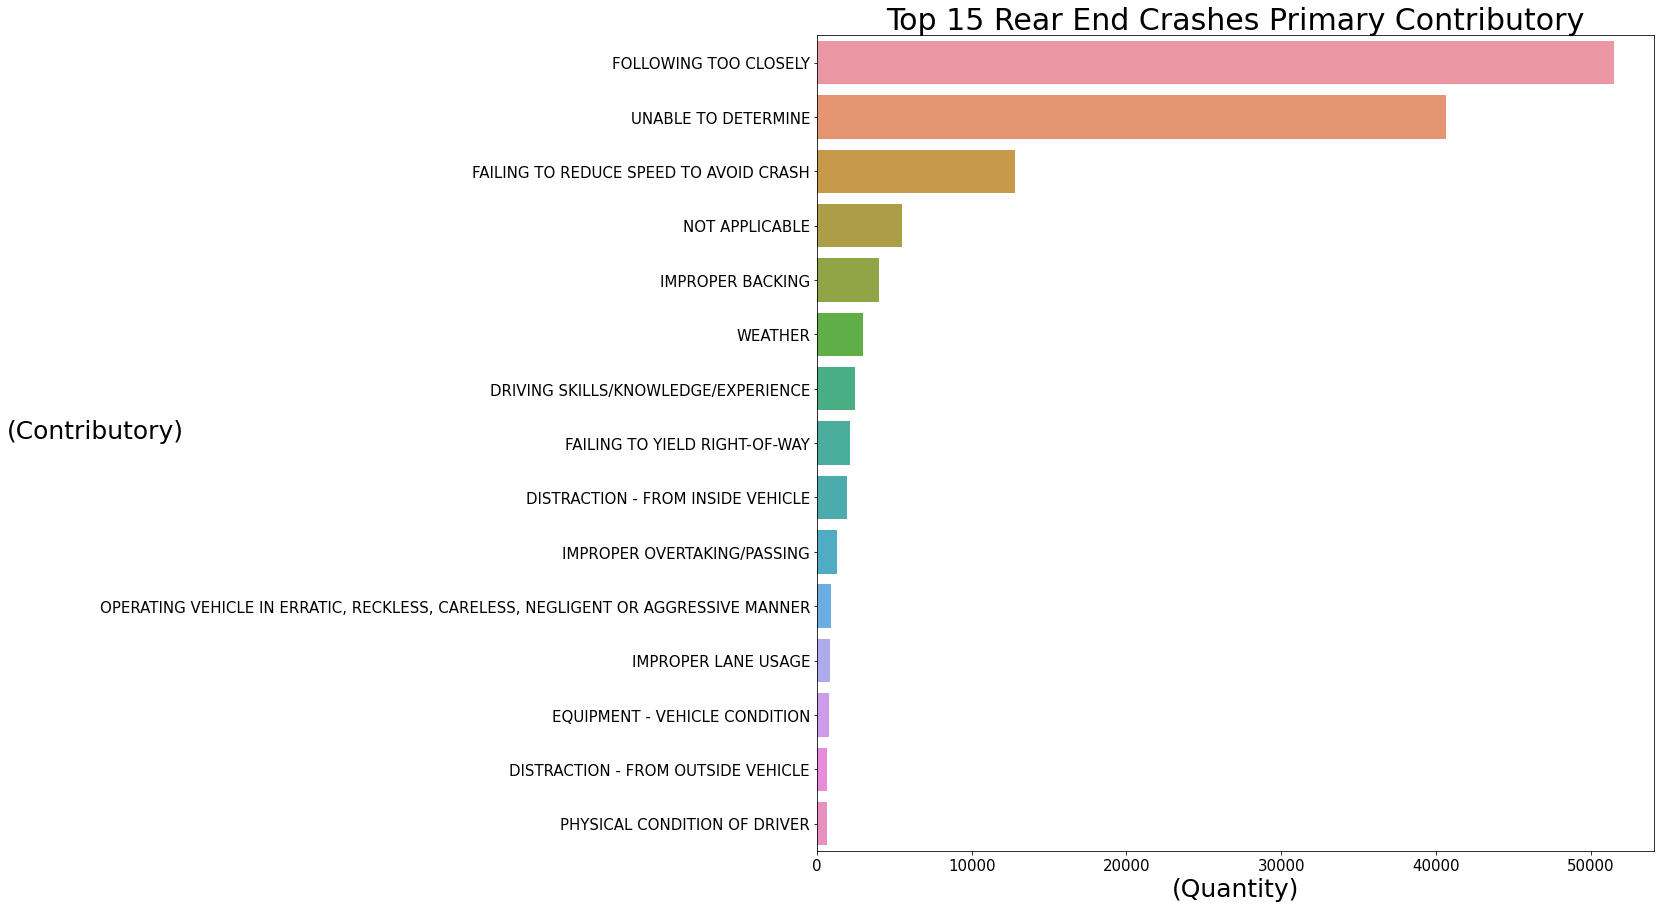

In [54]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,15))

y = rear_end.PRIM_CONTRIBUTORY_CAUSE.value_counts().values[:15]
x = rear_end.PRIM_CONTRIBUTORY_CAUSE.value_counts().index[:15]

sns.barplot(y, x)
plt.title('Top 15 Rear End Crashes Primary Contributory', size=30)
plt.ylabel("(Contributory)", size=25, rotation=0)
plt.xlabel("(Quantity)", size=25)
plt.xticks(size=15)
plt.yticks(size=15);

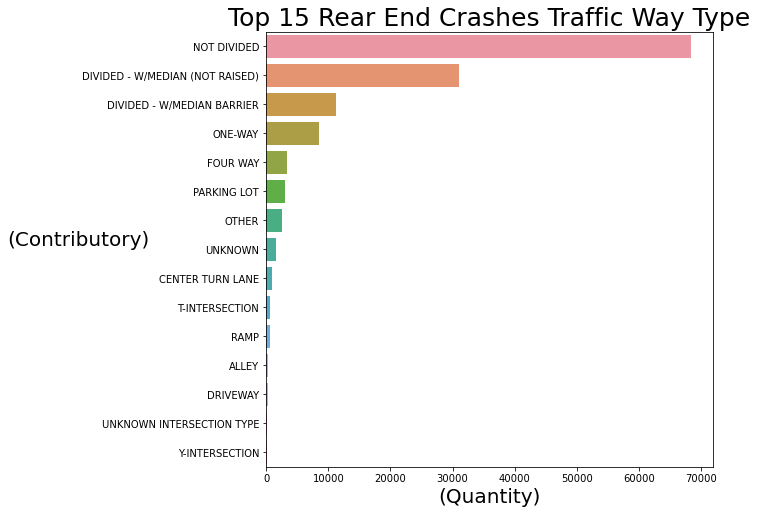

In [55]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(8,8))
y= rear_end.TRAFFICWAY_TYPE.value_counts().values[:15]
x=rear_end.TRAFFICWAY_TYPE.value_counts().index[:15]

sns.barplot(y, x)
plt.title('Top 15 Rear End Crashes Traffic Way Type', size=25)
plt.ylabel("(Contributory)", size=20, rotation=0)
plt.xlabel("(Quantity)", size=20)
plt.xticks(size=10)
plt.yticks(size=10);

# Conclusion

<ul>
    <li>Final models show that certain columns have more of an effect on the severity of a car accident than others.</li>
    <li>Demonstrated how different classification models work and how we can compare models using the roc_auc score metric.</li>
    <li>I used Random Forest classifier due to its high score among the all models used
    </li>
</ul>

### Few points that are visible in the data
<ul>
    <li>Noticed increased number of the accidents is in the month closer to October.</li>
    <li>Noticed increased number of the accidents in the rush hour.</li>
    <li>Most accidents occurred in a clear weather condition.</li>
    <li>Accidents are more likely to occur in Summer season.</li>
    <li>Most accidents happened in a DRY Road condition.</li>
    <li>Most severe and non severe accident damage cost is more than $1500.</li>
</ul>